Importação do csv

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import lightgbm as lgb
import pickle

df = pd.read_csv("../../../Files/df_to_train.csv")
df['Total_Review'] = df['Total_Review'].fillna('')
df.head(5)


,Total_Review,review_type
0,Location excellent rooms extremely comfortable...,positive
1,comfortable bed excellent air con great locati...,positive
2,views,positive
3,Clean comfortable room Kettle selection tea ba...,positive
4,Beds comfy staff lovely food amazing room spac...,positive


Criar objeto TF-IDF Vectorizer

In [2]:
tfidf_vect = TfidfVectorizer(max_features=7000, ngram_range=(1, 3))
tfidf_vect.fit(df.Total_Review)

with open('tfidf_vectorizer_lgb.pkl', 'wb') as f:
    pickle.dump(tfidf_vect, f)

text_vect = tfidf_vect.transform(df.Total_Review)

Mapear os valores para numéricos e dividir os dados em conjunto de treinamento e teste

In [3]:
X = text_vect
y = df['review_type']
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instanciar Modelo LightGBM

In [4]:
lgbm = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.05, num_leaves=31, max_depth=7, random_state=42)

Treino

In [5]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.191066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 144039
[LightGBM] [Info] Number of data points in the train set: 25747, number of used features: 4401
[LightGBM] [Info] Start training from score -1.094697
[LightGBM] [Info] Start training from score -1.099934
[LightGBM] [Info] Start training from score -1.101218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(learning_rate=0.05, max_depth=7, n_estimators=1000,
               random_state=42)

Teste

In [6]:
y_pred = lgbm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy: 0.7758272487183471


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      2112
           1       0.77      0.64      0.70      2157
           2       0.87      0.85      0.86      2168

    accuracy                           0.78      6437
   macro avg       0.78      0.78      0.77      6437
weighted avg       0.78      0.78      0.77      6437



Matriz de confusão

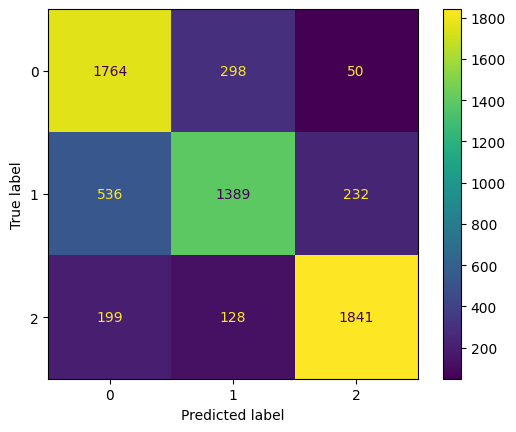

In [8]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Salvar modelo

In [9]:
with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(lgbm, f)